# Problem Statement
You'll be using the Happy House dataset for this part of the assignment, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

np.random.seed(1)

### Loading Data

In [3]:
train_dataset = h5py.File('HappyHousedataset/train_happy.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('HappyHousedataset/test_happy.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

# the list of classes
classes = np.array(test_dataset["list_classes"][:]) 

In [20]:
# normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# reshape labels
Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

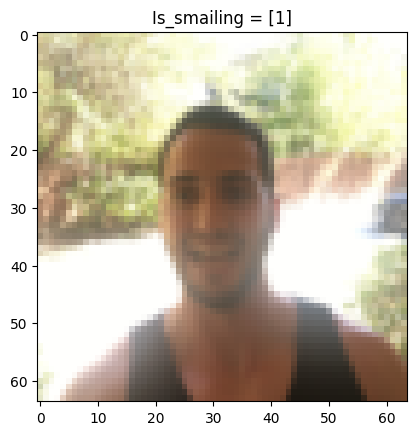

In [37]:
# check one of the images
index = 50 
plt.imshow(X_train[index])
plt.title('Is_smailing = '+str(Y_train[index]))
plt.show()

In [39]:
# data information
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## Modeling
we're developing a sequentioal API model using Keras library. 

Sequential model allows building layer by layer model, which is ideal for simpler tasks with one input tensor and one output tensor for each layer. 

In [45]:
def happymodel():
    """
    Implement forward propagation for the binary classification

    Arguments:
    None

    Returns:
    TF Keras Model
    """
    model = tf.keras.Sequential([
        # Zeropadding2D with padding 3 and input shape of (64x64x3)
        tfl.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)),
        # Conv2D layer with 32 7x7 filters and stride 1
        tfl.Conv2D(filters=32, kernel_size=(7,7),strides=(1,1),activation='linear',padding='valid'),
        # BatchNormalization 
        tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
        # ReLU
        tfl.ReLU(negative_slope=0.0,threshold=0.0),
        # MaxPooling2D with default parameters
        tfl.MaxPooling2D(pool_size=(2,2),strides=None),
        # Flatten layer
        tfl.Flatten(),
        # FC Dense layer with 1 unit for output and sigmoid activation
        tfl.Dense(units=1 , activation = 'sigmoid')    
    ])
    return model


In [46]:
happymodel = happymodel()
happymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                        

## Compile the model

In [47]:
# define optimizer, loss function and accuracy metris
happymodel.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# training
happymodel.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 17ms/step - loss: 0.6579 - accuracy: 0.8000
Epoch 2/10
38/38 [==============================] - 1s 17ms/step - loss: 0.2476 - accuracy: 0.8933
Epoch 3/10
38/38 [==============================] - 1s 18ms/step - loss: 0.1728 - accuracy: 0.9367
Epoch 4/10
38/38 [==============================] - 1s 18ms/step - loss: 0.1117 - accuracy: 0.9600
Epoch 5/10
38/38 [==============================] - 1s 18ms/step - loss: 0.1219 - accuracy: 0.9550
Epoch 6/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0938 - accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0821 - accuracy: 0.9817
Epoch 8/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0794 - accuracy: 0.9700
Epoch 9/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0520 - accuracy: 0.9833
Epoch 10/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0974 - accuracy: 0.9667


In [49]:
happymodel.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.2067 - accuracy: 0.9267


[0.20670445263385773, 0.9266666769981384]